# Import libraries and files 

In [73]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go

In [74]:
# read csv file
df_audio_features_5t = pd.read_csv('df_audio_features_5000.csv')

In [75]:
# Remove leading/trailing whitespace from column names
df_audio_features_5t.columns = df_audio_features_5t.columns.str.strip()

In [114]:
df_audio_features_5t

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [76]:
# Set the display option to show 100 rows

pd.set_option('display.max_rows', 100)

In [77]:
#df_audio_features_5t.info()

In [78]:
# Count the number of missing values
missing_values = df_audio_features_5t.isnull().sum()
total_missing_values = missing_values.sum()
print("\nTotal number of missing values in the DataFrame:", total_missing_values)


Total number of missing values in the DataFrame: 0


In [39]:
#df_audio_features_5t.isnull().sum()

In [40]:
#df_audio_features_5t.describe()

In [79]:
# Drop id 

to_drop = ['Unnamed: 0','key','id','type',"duration_ms", 'time_signature', 'mode']
df_5t_songs = df_audio_features_5t.drop(columns=to_drop)

In [80]:
df_5t_songs = df_5t_songs.set_index(['html','artist', 'name'])


In [81]:
# Remove duplicate columns
spotify_clean = df_5t_songs[-df_5t_songs.duplicated()]
spotify_clean = spotify_clean.reset_index()

# Remove duplicate songs
spotify_clean = spotify_clean.drop_duplicates(subset=["name", "artist"])

spotify_clean = spotify_clean.set_index(['html','artist', 'name'])
# 5110 songs

In [44]:
#print(df_5t_songs.to_string())

In [82]:
spotify_clean.head(10)

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
html,artist,name,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.658,0.2590,-13.141,0.0705,0.694,0.000059,0.975,0.306,110.376
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,0.742,0.3990,-12.646,0.0346,0.217,0.000002,0.107,0.693,125.039
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",0.851,0.7300,-11.048,0.3470,0.453,0.000063,0.124,0.905,93.698
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.705,0.0502,-18.115,0.0471,0.879,0.000041,0.386,0.524,106.802
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.651,0.1190,-19.807,0.0380,0.916,0.000343,0.104,0.402,120.941
https://open.spotify.com/track/5pstSsK0G4q86gdyy1Spqh,Stan Getz,Desafinado,0.466,0.1460,-17.500,0.0649,0.931,0.154000,0.107,0.423,142.885
https://open.spotify.com/track/33u3dO0JWjerYpFN61J3ug,Maria Gasolina,Madalena,0.675,0.2070,-13.820,0.0545,0.963,0.414000,0.112,0.684,93.531
https://open.spotify.com/track/0ylJQpV3K4XnhWhLDMFmH7,Sílvia Pérez Cruz,O Meu Amor É Glòria,0.504,0.7330,-10.720,0.3890,0.696,0.000056,0.673,0.886,96.565
https://open.spotify.com/track/1wL2dk42Cxu4zCJs4SvFsZ,Paula Morelenbaum,Brigas Nunca Mais,0.694,0.5460,-11.452,0.0400,0.398,0.076000,0.153,0.641,170.032


## Min Max

In [83]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")

# Scale the new_df DataFrame
with_minmax = scaler.fit_transform(spotify_clean)

In [84]:
with_minmax_2=with_minmax.copy()

In [85]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 50, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(with_minmax_2)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
with_minmax_2["cluster"] = clusters

with_minmax_2

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
html,artist,name,,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,40
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,6
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,18
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,25
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,25
...,...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,35
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,37
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,35


In [ ]:
with_minmax_2.groupby(by="cluster").mean()

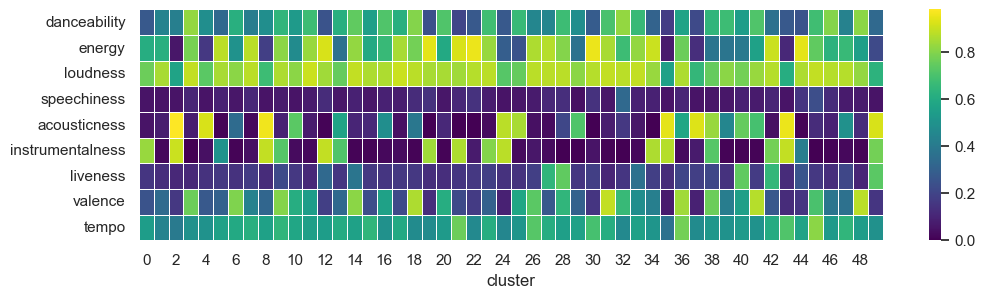

In [50]:
cluster_means = with_minmax_2.groupby("cluster").mean().round(2)

sns.set(rc={'figure.figsize':(12,3)})
sns.heatmap(cluster_means.T, linewidths=0.7, cmap="viridis");

In [51]:
# 1 cluster: 87  songs ( too sweet ancient pop, too happy, good for crazy people)==not clean Rihanna with Nirvana
# 2 cluster: 64 songs ( instrumental, nice, mostly piano)                        == not clean new age with classic 
# 3 cluster: 106 songs ()                                                        == not clean blues with latina

In [52]:
#  drop the column "tempo"- little bit better , but still different mode and genre
# reggi with Ed Sheeran

In [87]:
with_minmax_2.loc[with_minmax_2['cluster'] == 1].head(100)


,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
html,artist,name,,,,,,,,,,
https://open.spotify.com/track/5BUYtDh62uirLH4vMnE2dA,Brazilian Jazz,Laia Ladia,0.400207,0.469,0.758290,0.045643,0.226908,0.043046,0.074975,0.516751,0.399995,1
https://open.spotify.com/track/2B0vzJSvp2Y0Bx8HUN4jyT,Lou Doillon,Devil Or Angel,0.630817,0.645,0.842473,0.030501,0.000227,0.000069,0.111449,0.288325,0.448110,1
https://open.spotify.com/track/1nXXiAnSuCfmf733yQm42T,Girls,Lust For Life,0.267839,0.696,0.878566,0.034858,0.011446,0.161421,0.149949,0.523858,0.360699,1
https://open.spotify.com/track/3qPC3JU9mtANkxooHtATl1,The Wave Pictures,Strange Fruit For David,0.435367,0.693,0.903818,0.174292,0.116466,0.000000,0.255319,0.610152,0.382359,1
https://open.spotify.com/track/52aLJ0vt7gC2Ck8YF1pTsl,Hefner,The Hymn For The Cigarettes,0.437435,0.578,0.863242,0.063181,0.004157,0.001228,0.291793,0.452792,0.621562,1
https://open.spotify.com/track/6xNcAs7xEEHCdh6JERq0bo,Twerps,Anything New,0.304033,0.589,0.853151,0.038126,0.122490,0.001563,0.134752,0.516751,0.575405,1
https://open.spotify.com/track/5BP0oaQ1VhuaznT77CBXQp,Pixies,Where Is My Mind?,0.525336,0.597,0.846679,0.043137,0.017771,0.000869,0.092199,0.187817,0.383111,1
https://open.spotify.com/track/04GyFGGvAyItrPfeV0HNj2,Tame Impala,Eventually,0.429162,0.616,0.876773,0.035185,0.012048,0.000679,0.099392,0.144162,0.364358,1
https://open.spotify.com/track/37dfPnGuxOSITI8Hnc0uOD,Núria Graham,Toxic,0.444674,0.621,0.842995,0.031373,0.000084,0.267005,0.062918,0.216244,0.530291,1


##  Standard scaler

In [88]:
spotify_clean

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
html,artist,name,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573


In [89]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
standard_scaler_5k = scaler.fit_transform(spotify_clean)

In [90]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 50, # you always choose the number of k here
                   n_init="auto",
                   random_state = 100)

# Fit the model to the data
my_kmeans.fit(standard_scaler_5k)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
standard_scaler_5k["cluster"] = clusters

standard_scaler_5k

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
html,artist,name,,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.695804,-1.359813,-0.592968,-0.176462,1.126538,-0.702485,5.281542,-0.485685,-0.288586,28
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,1.080967,-0.876948,-0.514606,-0.684262,-0.209251,-0.702637,-0.524398,0.907696,0.223423,37
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",1.580762,0.264683,-0.261630,3.734592,0.451643,-0.702472,-0.410687,1.670995,-0.870955,13
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.911312,-2.079972,-1.380390,-0.507451,1.644612,-0.702534,1.341797,0.299217,-0.413384,6
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.663707,-1.842679,-1.648247,-0.636170,1.748226,-0.701721,-0.544464,-0.140040,0.080327,6
...,...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-1.395082,-2.013751,-2.215463,-0.504622,1.751027,1.218293,-0.683593,-1.351598,-1.073203,14
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-1.459276,-1.904761,-1.975311,-0.548472,1.577402,0.441859,-0.775899,-1.459612,-1.239833,14
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-2.048026,-2.249907,-5.313386,-0.559787,1.846240,1.900695,-0.723726,-1.463572,-1.643525,32


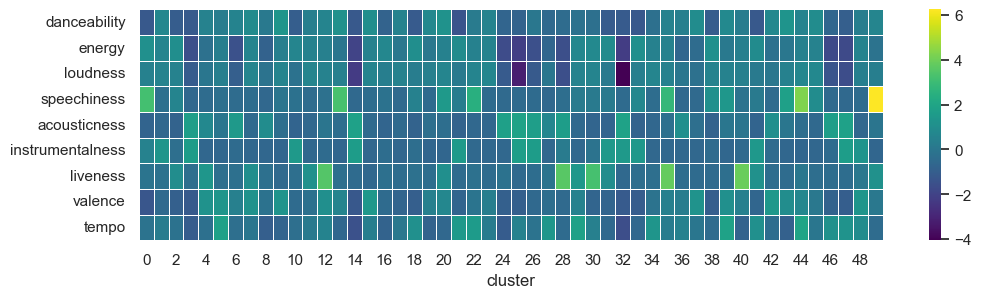

In [91]:
cluster_means = standard_scaler_5k.groupby("cluster").mean().round(2)

sns.set(rc={'figure.figsize':(12,3)})
sns.heatmap(cluster_means.T, linewidths=0.7, cmap="viridis");

In [58]:
#  1 cluster- not clean Nirvana with L.A and Bryan Adams

In [94]:
with_minmax_2.loc[with_minmax_2['cluster'] == 3]

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
html,artist,name,,,,,,,,,,
https://open.spotify.com/track/4ic2XfSYoMch7DrdNf2T3N,Sophie Milman,Agua De Beber,0.682523,0.759,0.838740,0.047603,0.243976,0.002305,0.076596,0.710660,0.441502,3
https://open.spotify.com/track/1K3JwmUeXS2g8OpRhtxtDO,Batida,Alegria,0.739400,0.691,0.832170,0.094662,0.003323,0.221320,0.133739,0.758376,0.635614,3
https://open.spotify.com/track/7aZjExRehKGrH6vZ3MNXlq,Bob Dylan,Precious Angel,0.761117,0.703,0.840061,0.042048,0.115462,0.000017,0.108409,0.824365,0.572807,3
https://open.spotify.com/track/3M9Apu4OZfylLTFKvgEtKa,Tiësto,Ritual,0.669080,0.726,0.906573,0.060131,0.157631,0.000000,0.085512,0.778680,0.537390,3
https://open.spotify.com/track/2hgzdQdnfWwtdpZbhZlV72,Jennifer Lopez,Ain't Your Mama,0.782834,0.678,0.887989,0.253813,0.047390,0.000009,0.066261,0.832487,0.561124,3
...,...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/4W3FJapn5CD6Fnrlfj4HFe,C. Tangana,Booty,0.853154,0.771,0.911023,0.087691,0.016767,0.000002,0.091287,0.727919,0.480994,3
https://open.spotify.com/track/3GC7jZ05UuZVPNy2JMgPHf,Jonathan Traylor,Hope,0.897622,0.761,0.907665,0.068410,0.040462,0.000011,0.116515,0.679188,0.555923,3
https://open.spotify.com/track/5iOKGigwmEPBSPSkM8v5lx,Idahams,Man On Fire,0.798345,0.687,0.857520,0.178649,0.044679,0.000006,0.048632,0.806091,0.448778,3


# Principal Component Analysis (PCA)

In [95]:
from sklearn import set_config
set_config(transform_output="pandas")
import numpy as np
from sklearn.decomposition import PCA

In [96]:
with_minmax

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
html,artist,name,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [97]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(with_minmax)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(with_minmax)

pca_basic_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
html,artist,name,,,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.236586,-0.507918,-0.269352,0.532727,0.596678,0.200016,0.106456,-0.010567,-0.006916
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,-0.210739,-0.388241,0.094344,-0.170733,0.020523,0.098903,0.185907,-0.018403,0.014443
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",-0.330916,-0.475246,0.286604,-0.006355,0.027413,-0.141577,-0.164698,0.286589,0.070548
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.382796,-0.817705,-0.075747,0.108879,0.214432,0.091820,0.099434,0.007442,0.013036
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.441461,-0.755879,-0.163595,-0.074241,-0.001173,0.089311,-0.018344,-0.005033,0.061991
...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.108678,-0.123094,-0.115855,-0.072311,-0.015872,-0.075347,0.082709,0.017714,0.006971
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.911159,-0.220910,-0.321150,-0.086911,-0.040889,-0.112433,0.103460,0.011612,0.007642
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.404599,0.007607,-0.028451,-0.076090,-0.022705,-0.157230,0.229979,0.058134,0.252539


In [98]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.45018564, 0.30093843, 0.09946053, 0.04508186, 0.03719099,
       0.02905613, 0.0243382 , 0.00962737, 0.00412087])

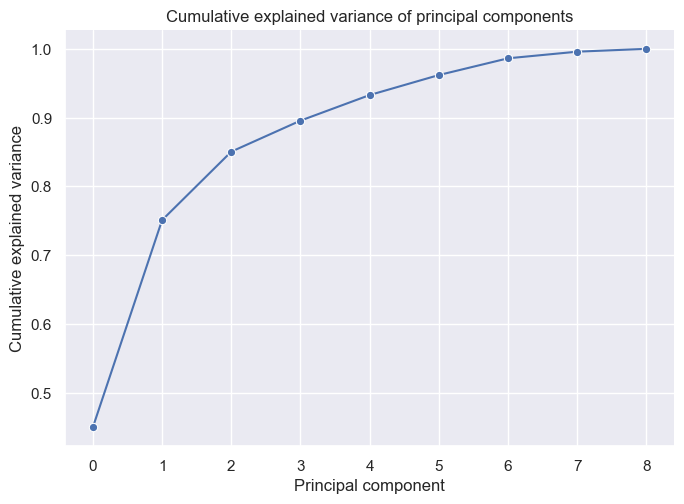

In [99]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

In [100]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

In [101]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(with_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,,,pca0,pca1,pca2,pca3,pca4,pca5
html,artist,name,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.236586,-0.507918,-0.269352,0.532727,0.596678,0.200016
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,-0.210739,-0.388241,0.094344,-0.170733,0.020523,0.098903
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",-0.330916,-0.475246,0.286604,-0.006355,0.027413,-0.141577
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.382796,-0.817705,-0.075747,0.108879,0.214432,0.091820
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.441461,-0.755879,-0.163595,-0.074241,-0.001173,0.089311
...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.108678,-0.123094,-0.115855,-0.072311,-0.015872,-0.075347
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.911159,-0.220910,-0.321150,-0.086911,-0.040889,-0.112433
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.404599,0.007607,-0.028451,-0.076090,-0.022705,-0.157230


In [111]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 40, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_variance_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
pca_variance_df["cluster"] = clusters

pca_variance_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,cluster
html,artist,name,,,,,,,
https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,Se Eu Quiser Falar Com Deus,0.236586,-0.507918,-0.269352,0.532727,0.596678,0.200016,4
https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,Saudade De Bahia,-0.210739,-0.388241,0.094344,-0.170733,0.020523,0.098903,6
https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,"Canta Canta, Minha Gente",-0.330916,-0.475246,0.286604,-0.006355,0.027413,-0.141577,1
https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,Chico César,Mulher Eu Sei,0.382796,-0.817705,-0.075747,0.108879,0.214432,0.091820,38
https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,Rosa Morena,0.441461,-0.755879,-0.163595,-0.074241,-0.001173,0.089311,38
...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.108678,-0.123094,-0.115855,-0.072311,-0.015872,-0.075347,23
https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.911159,-0.220910,-0.321150,-0.086911,-0.040889,-0.112433,36
https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.404599,0.007607,-0.028451,-0.076090,-0.022705,-0.157230,23


In [ ]:
# cluster 20: Percy Faith	and  DJ Zinc	 and Marilyn Manson	
# cluster 19: Death Metal----don't never ever turn it on again!!!!!!!

In [113]:
pca_variance_df.loc[pca_variance_df['cluster'] == 3].head(100)

,,,pca0,pca1,pca2,pca3,pca4,pca5,cluster
html,artist,name,,,,,,,
https://open.spotify.com/track/2fGkzgwwhiyYRgXZHUxYA9,Beach Beach,Plants,-0.133504,0.500963,0.490196,0.250444,-0.048600,0.100230,3
https://open.spotify.com/track/7rei6sQZgKOOZF7HnjYxA9,Pure Bliss,Thine Eyes,0.096967,0.241753,0.453716,0.313564,-0.053452,-0.001769,3
https://open.spotify.com/track/1s8fHfQDSkwbDHG5nhkQ2V,Renaldo & Clara,Els dies s'allarguen,0.033121,0.327495,0.595219,-0.079466,0.112356,0.087472,3
https://open.spotify.com/track/7tBbPgqk1pJ6NOVZgrttEk,Kim,Mk Love Triangle,-0.124511,0.479313,0.441500,0.241228,-0.029153,-0.104524,3
https://open.spotify.com/track/0yRpb5gLOPpi574BKoOCPd,Colleen Green,Number One,0.013916,0.419060,0.744918,0.230089,-0.053168,-0.034165,3
https://open.spotify.com/track/1a1HWwO0dm5uN5cs6TGG8f,PUPUT,Flirts,0.048045,0.579695,0.570742,0.285542,-0.105032,0.049674,3
https://open.spotify.com/track/2JO3HwMRPeya8bXbtbyPcf,Joy Division,Love Will Tear Us Apart,-0.133224,0.455302,0.691248,0.097407,-0.201007,-0.018011,3
https://open.spotify.com/track/6urCNDKBFK8oIimmPfpQ2r,Les Sueques,Bromes,-0.049132,0.497087,0.436334,-0.017793,0.047529,0.137884,3
https://open.spotify.com/track/1FwdUkQ8BUZOCqopatIe0S,Baxter Dury,Pleasure,0.029995,0.304694,0.582632,0.008458,0.017031,0.209183,3


In [105]:
pca_variance_df.groupby(by="cluster")['pca0'].count()


cluster
0      99
1      92
2     193
3      87
4      86
5      66
6      60
7      35
8     109
9      45
10     77
11    132
12    106
13    109
14     58
15    100
16     84
17     86
18    200
19     90
20     52
21    127
22     64
23     85
24     44
25    108
26    135
27     81
28     62
29    123
30    125
31    101
32     61
33     39
34     71
35     66
36     79
37    102
38    136
39     21
40     69
41    123
42    115
43    108
44     28
45     66
46     67
47    170
48    128
49     25
50     23
51     85
52     48
53     11
54     90
55     83
56     89
57     74
58     59
59     53
Name: pca0, dtype: int64